## Using Linear Regression to predict Diabetes


In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading data
df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory data analysis


In [3]:
# Understanding your variables
# first five columns of the dataset
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# bottom five rows of the dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Display random data
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
441,2,83,66,23,50,32.2,0.497,22,0
156,2,99,52,15,94,24.6,0.637,21,0
434,1,90,68,8,0,24.5,1.138,36,0
597,1,89,24,19,25,27.8,0.559,21,0
289,5,108,72,43,75,36.1,0.263,33,0
351,4,137,84,0,0,31.2,0.252,30,0
604,4,183,0,0,0,28.4,0.212,36,1
256,3,111,56,39,0,30.1,0.557,30,0
746,1,147,94,41,0,49.3,0.358,27,1
36,11,138,76,0,0,33.2,0.420,35,0


In [6]:
# Shape of the dataset
df.shape

(768, 9)

In [7]:
# list of types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# concise summary of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Observation
In the above table, the min value of columns Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin and BMI is zero. This values cannot be zero so we will impite them with mean values.

### Data Cleaning

In [11]:
# checking for duplicates
df.duplicated().sum()

0

In [12]:
# checking null values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Replacing zeros with the mean

In [13]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Pregnancies'] = df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())


In [14]:
# checking the summary of thr data after replacing zeros with the mean
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization

Positive(1):  268
Negative(0):  500


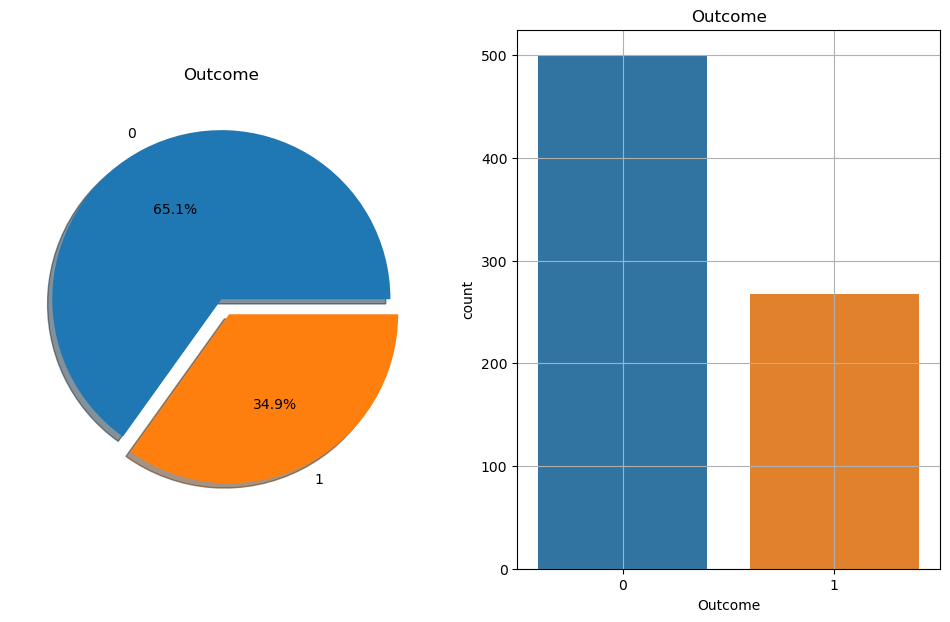

In [15]:
# Count plot

f,ax=plt.subplots(1,2,figsize=(12,7))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(data=df, x='Outcome',ax=ax[1])
ax[1].set_title('Outcome')
N,P=df['Outcome'].value_counts()
print('Positive(1): ',P)
print('Negative(0): ',N)
plt.grid()
plt.show()

268 people are diabetic (1)

500 people are not diabetic (0)


The countplot tells us that the dataset is imbalanced as the number of patients who are diabetic is lower.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

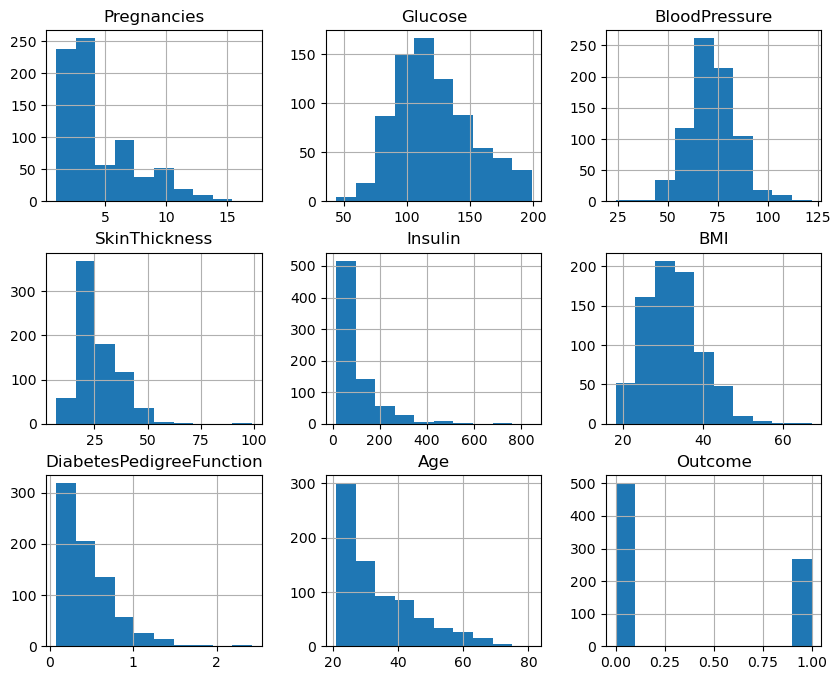

In [16]:
# Histogram
df.hist(figsize=(10,8))

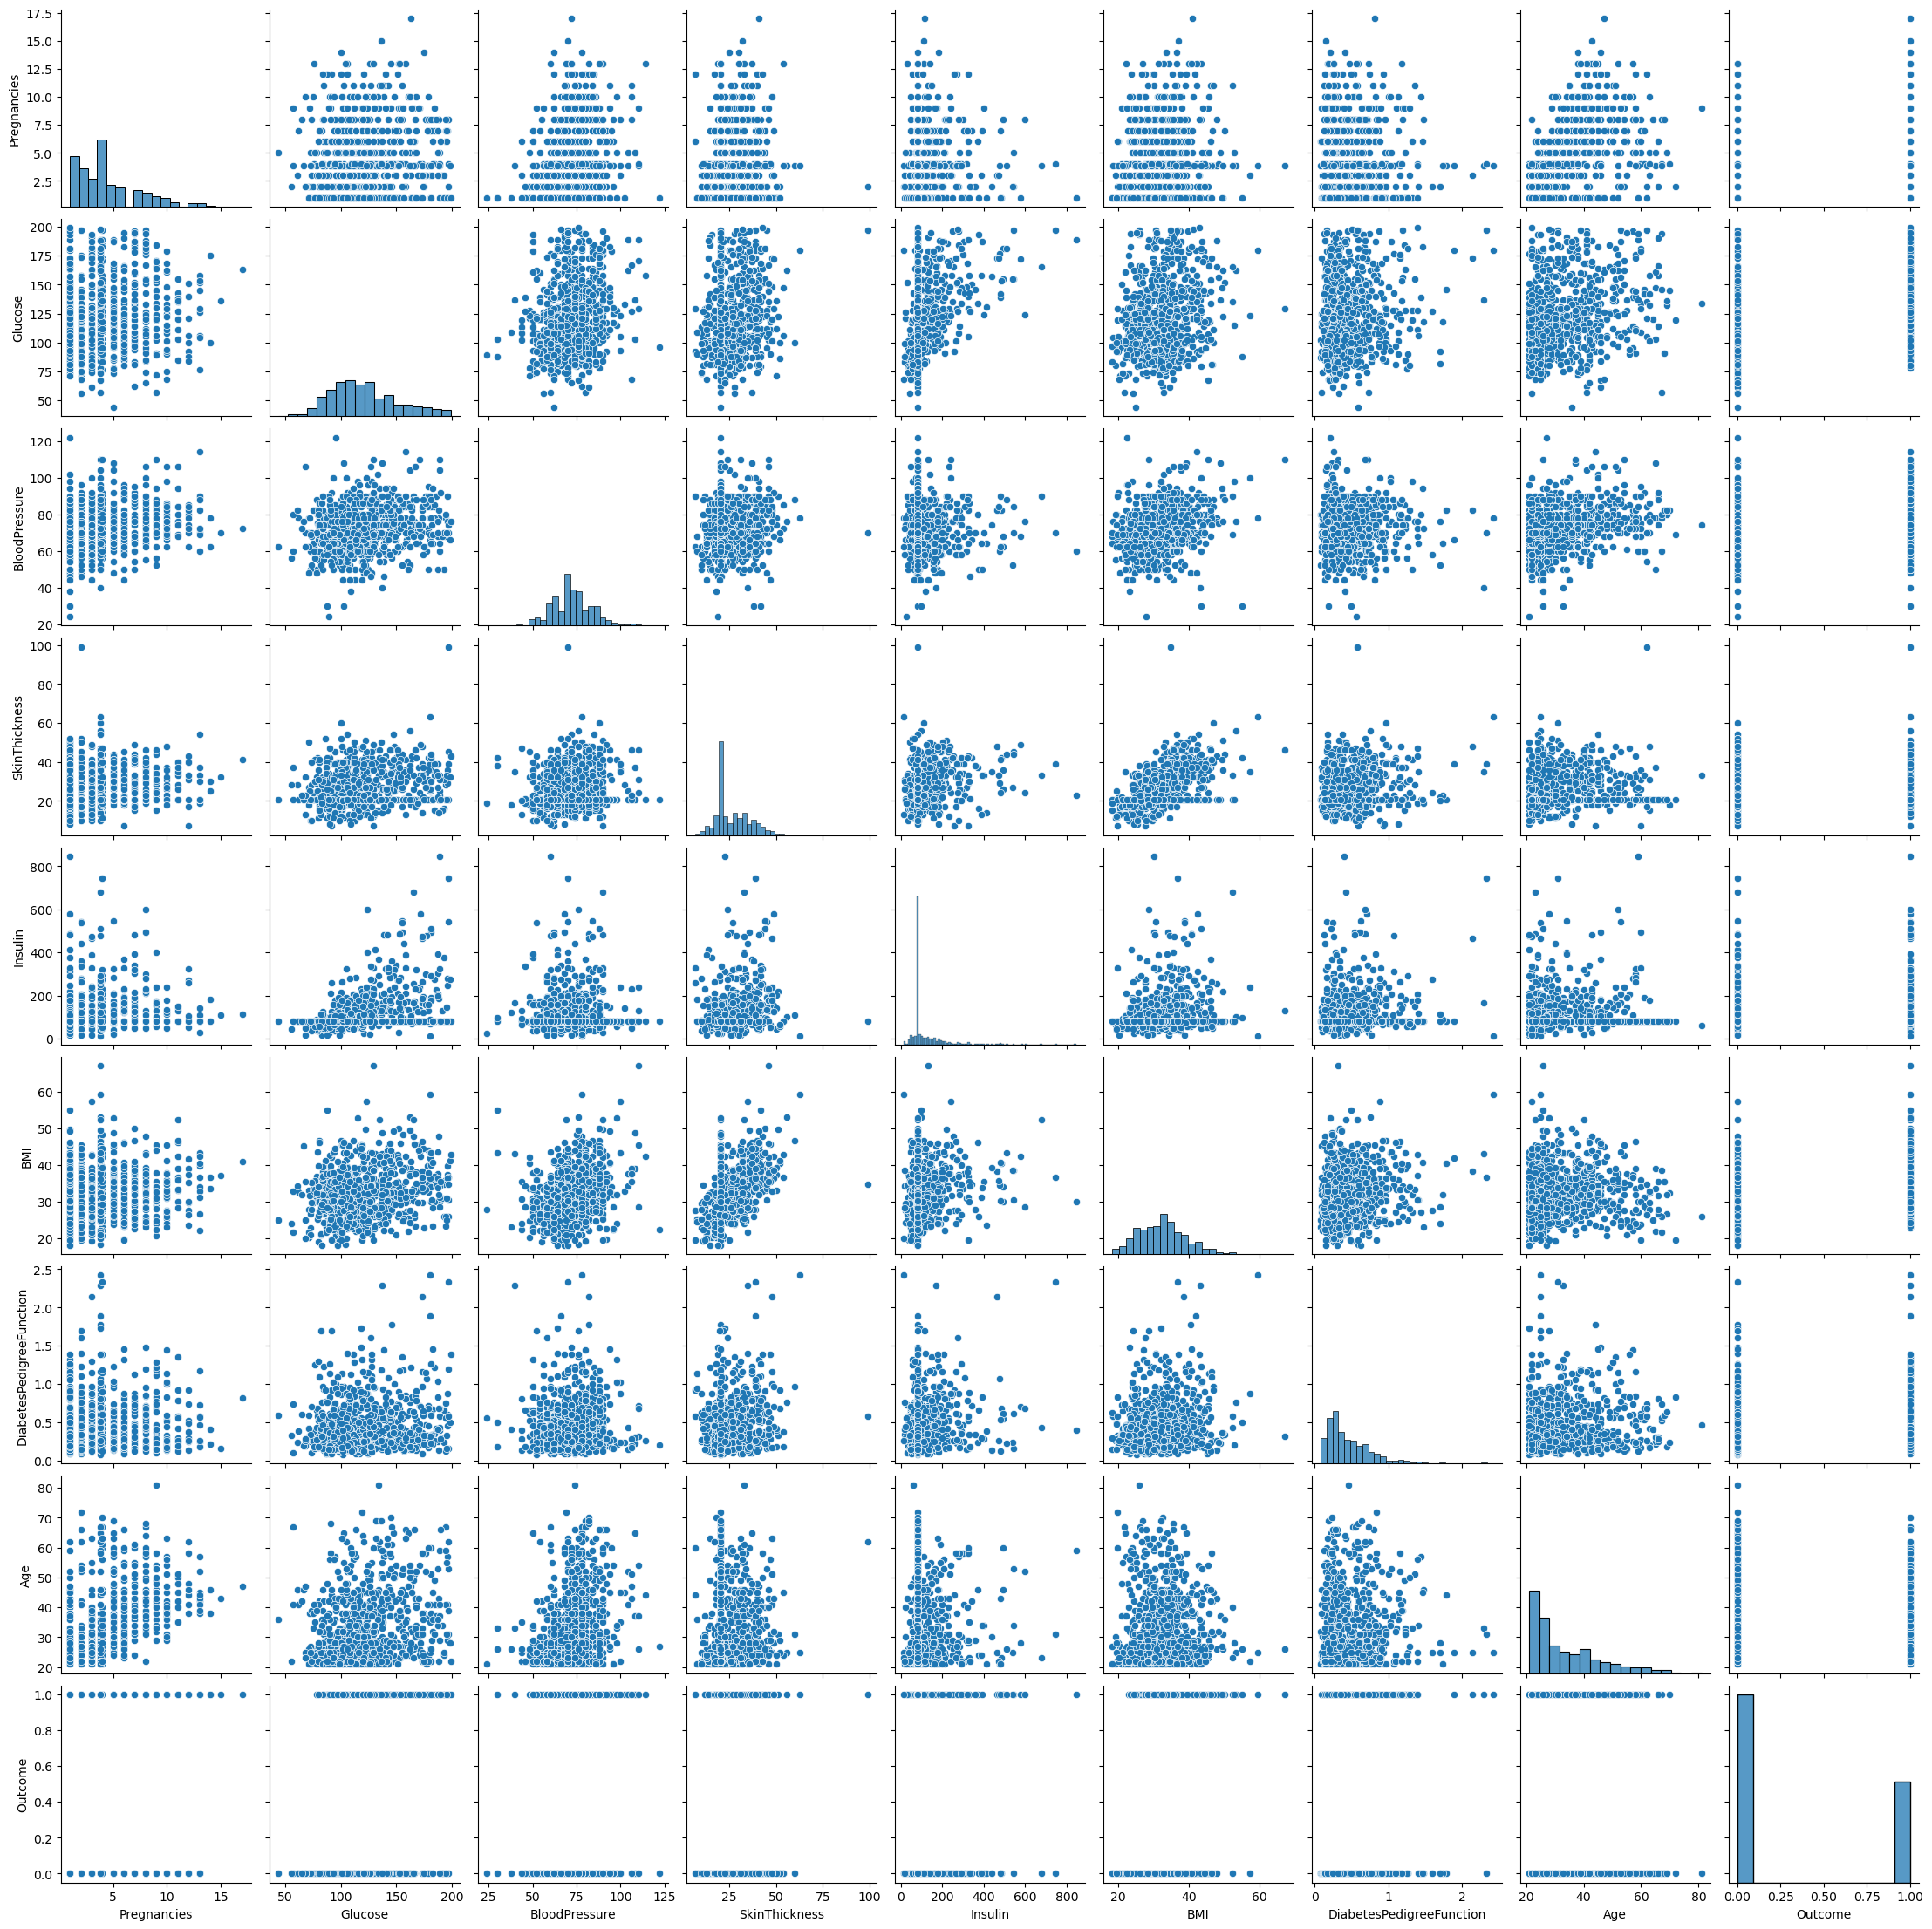

In [17]:
# Pair plot puts several scatter plots in one plot and also provides the distribution diagonally. Helps understand relationships
sns.pairplot(df)

## Analyzing relationships between variales

# Correlation analysis

Correlation Analysis is statistical method that is used to discover if there is a relationship between two variables/datasets, and how strong that relationship may be. 
Essentially, correlation analysis is used for spotting patterns within datasets. A positive correlation result means that both variables increase in relation to each other, while a negative correlation means that as one variable decreases, the other increases.

We correlate feature variables with target variables to get to know how much dependancy is there between particular feature variables and target variables.

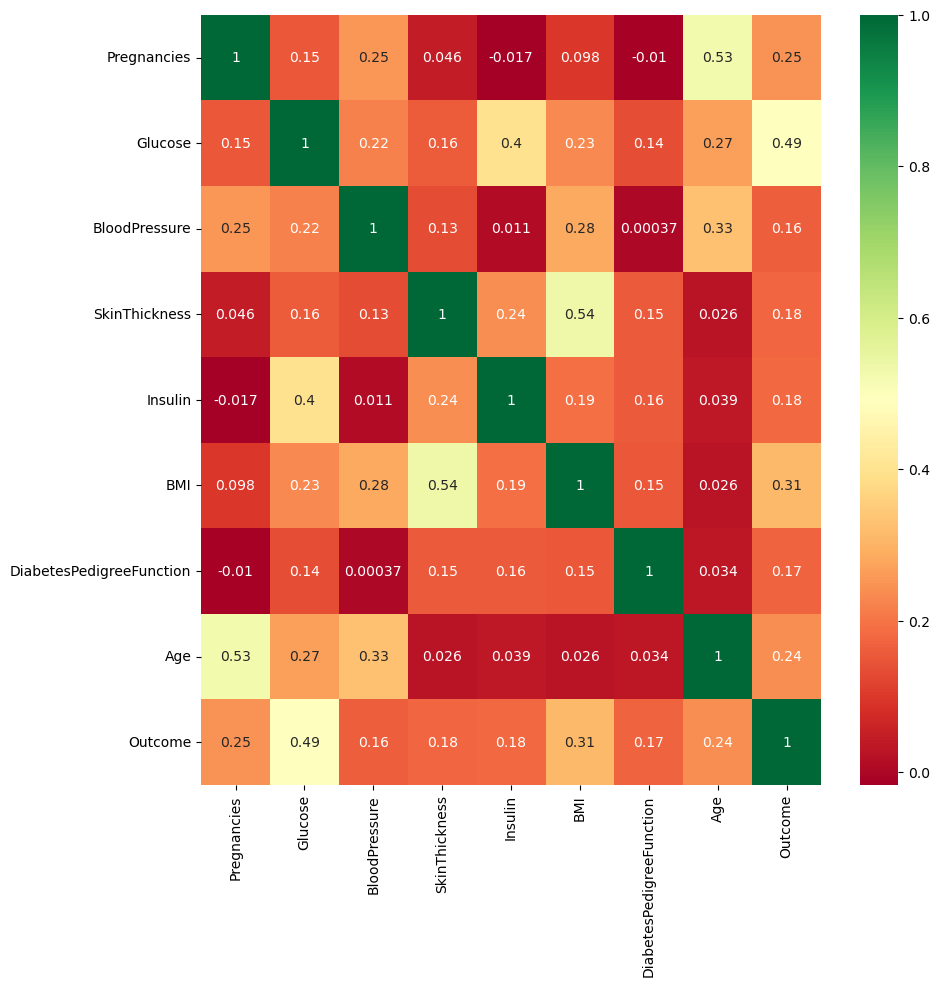

In [18]:
#correlation of each feature
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
# plot heat map
g= sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From the correlation heatmap, we can see that there is a higher correlation between Outcome and pregnancies, glucose, BMI, Age,Insulin. We can select these features to accept input from the user and predict the outcome.

## Split data frame into x and y

In [19]:
target_name = 'Outcome'

# separate object from target feature
y= df[target_name]

# separate object from input features
x= df.drop(target_name, axis=1)

In [20]:
x.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [21]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data.

In [22]:
# applying standard scaler
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(x)

# Perform standardization on the data
SSX = scaler.transform(x)

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [24]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [25]:
x_test.shape,y_test.shape

((154, 8), (154,))

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

## Making Prediction

In [27]:
# making prediction on test data
lr_pred=lr.predict(x_test)

 ## Model Evaluation

In [28]:
from sklearn.metrics import accuracy_score
print("Train Accuracy", lr.score(x_train, y_train))
print("Accuracy(Test) score", lr.score(x_test, y_test))
print("Accuracy(Test) score", accuracy_score(y_test, lr_pred))


Train Accuracy 0.7850162866449512
Accuracy(Test) score 0.7727272727272727
Accuracy(Test) score 0.7727272727272727


## Confusion matrix

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, lr_pred)
cm

array([[86, 11],
       [24, 33]], dtype=int64)

<Axes: >

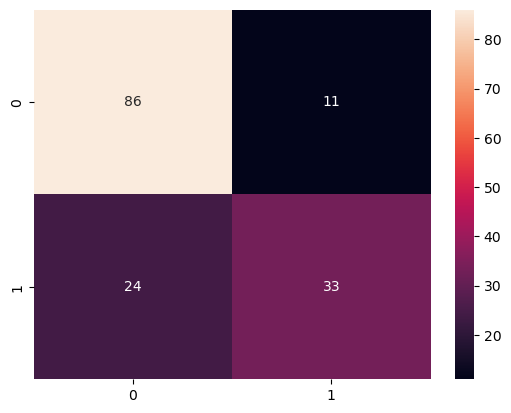

In [30]:
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True, fmt="d")

In [31]:
# precision score
from sklearn.metrics import precision_score
precision_score(y_test, lr_pred)

0.75

In [32]:
#recall
from sklearn.metrics import recall_score
recall_score(y_test, lr_pred)

0.5789473684210527

In [33]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test, lr_pred)

0.6534653465346535